## 导数
$$
f\prime\left( x_0 \right) =\lim_{\Delta x\rightarrow 0} \frac{\Delta y}{\Delta x}=\lim_{\Delta x\rightarrow 0} \frac{f\left( x_0+\Delta x \right) -f\left( x_0 \right)}{\Delta x}
$$


In [1]:
%matplotlib inline

In [8]:
import numpy as np
from d2l import torch as d2l
from matplotlib_inline import backend_inline

In [6]:
def f(x):
    return 3 * (x ** 2) - 4 * x

In [7]:
def numerical_lim(fun, x, h):
    return (fun(x + h) - fun(x)) / h


h = 0.1
for i in range(5):
    print(f'h={h:.5f},numerical_limit={numerical_lim(f, 1, h)}')
    h *= 0.1

h=0.10000,numerical_limit=2.3000000000000043
h=0.01000,numerical_limit=2.029999999999976
h=0.00100,numerical_limit=2.0029999999993104
h=0.00010,numerical_limit=2.000299999997956
h=0.00001,numerical_limit=2.0000300000155837


导数法则:
$$
\begin{aligned}
\left( u\pm v \right) \prime&=u\prime\pm v\prime
\\
\left( Cu \right) \prime&=Cu\prime
\\
\left( uv \right) \prime&=u\prime v+uv\prime
\\
\left( \frac{u}{v} \right) \prime&=\frac{u\prime v-uv\prime}{v^2}\left( v\ne 0 \right) 
\\
\end{aligned}
$$
复合函数求导
$$
\begin{aligned}
y=f\left( u \right) ,\;u=g\left( x \right) 
\\
\frac{\mathrm{d}y}{\mathrm{d}x}=\frac{\mathrm{d}y}{\mathrm{d}u}\cdot \frac{\mathrm{d}u}{\mathrm{d}x}
\end{aligned}
$$


In [9]:
def use_svg_display():  #@save
    backend_inline.set_matplotlib_formats('svg')

In [10]:
def set_figsize(figsize=(3.5,2.5)): #@save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [11]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [12]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

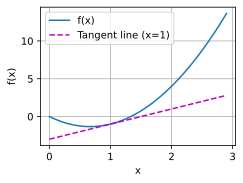

In [13]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 偏导数
偏导数的正式定义是基于极限的。对于一个二元函数 $f(x, y)$，它关于 $x$ 和 $y$ 的偏导数分别定义为：

$$ \frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h, y) - f(x, y)}{h} $$

$$ \frac{\partial f}{\partial y} = \lim_{h \to 0} \frac{f(x, y+h) - f(x, y)}{h} $$

**常用记号**：
函数 $f$ 关于 $x$ 的偏导数可以记为 $ \frac{\partial f}{\partial x} $、$ f_x(x,y) $ 或 $ \partial_x f $。
## 梯度

假设有一个n元函数 $f(x_1, x_2, \dots, x_n)$，它在空间中某一点 $P(a_1, a_2, \dots, a_n)$ 是可微的。那么，函数 $f$ 在点 $P$ 的梯度是一个向量，定义为：

$$
\nabla f(P) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right) \bigg|_P
$$

其中:
*   $\nabla$ (读作 "nabla") 是梯度算子。
*   $\frac{\partial f}{\partial x_i}$ 是函数 $f$ 对变量 $x_i$ 的**偏导数**，代表函数值仅仅沿着 $x_i$ 坐标轴方向的变化率，同时保持其他变量 $x_j (j \neq i)$ 不变。

方法:
- 先求偏导数
- 再把点带进去
### 布局 
参考(https://zdaiot.com/Math/%E7%9F%A9%E9%98%B5%E6%B1%82%E5%AF%BC%E6%B3%95%E5%88%99%E4%B8%8E%E6%80%A7%E8%B4%A8/)
#### 1. 分子布局 (Numerator Layout)

*   **别名**: **雅可比布局 (Jacobian Layout)**。
*   **核心思想**: 导数矩阵的形状由**分子（输出 $\mathbf{y}$）**决定行数，由**分母（输入 $\mathbf{x}$）**决定列数。
*   **结果形状**: $m \times n$。
*   **具体形式**: 这就是我们在教科书上学到的标准**雅可比矩阵 $\mathbf{J}$**。
    $$
    \frac{\partial \mathbf{y}}{\partial \mathbf{x}} \triangleq \mathbf{J} =
    \begin{bmatrix}
        \frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_1}{\partial x_n} \\
        \vdots & \ddots & \vdots \\
        \frac{\partial y_m}{\partial x_1} & \cdots & \frac{\partial y_m}{\partial x_n}
    \end{bmatrix}
    $$
    第 $i$ 行是输出向量的第 $i$ 个分量 $y_i$ 对输入向量 $\mathbf{x}$ 的所有分量的偏导。

#### 2. 分母布局 (Denominator Layout)
*   **别名**: 梯度布局
*   **核心思想**: 导数矩阵的形状由**分母（输入 $\mathbf{x}$）**决定行数，由**分子（输出 $\mathbf{y}$）**决定列数。
*   **结果形状**: $n \times m$。
*   **具体形式**: 它恰好是**雅可比矩阵的转置 $\mathbf{J}^\top$**。
    $$
    \frac{\partial \mathbf{y}}{\partial \mathbf{x}} \triangleq \mathbf{J}^\top =
    \begin{bmatrix}
        \frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_m}{\partial x_1} \\
        \vdots & \ddots & \vdots \\
        \frac{\partial y_1}{\partial x_n} & \cdots & \frac{\partial y_m}{\partial x_n}
    \end{bmatrix}
    $$
    第 $j$ 列是输出向量的第 $j$ 个分量 $y_j$ 对输入向量 $\mathbf{x}$ 的所有分量的偏导（即梯度 $\nabla_{\mathbf{x}} y_j$）。
    * 
假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则：

*   对于所有 $\mathbf{A} \in \mathbb{R}^{m \times n}$，都有 $\nabla_{\mathbf{x}} \mathbf{A}\mathbf{x} = \mathbf{A}^{\top}$

*   对于所有 $\mathbf{A} \in \mathbb{R}^{n \times m}$，都有 $\nabla_{\mathbf{x}} \mathbf{x}^{\top}\mathbf{A} = \mathbf{A}$

*   对于所有 $\mathbf{A} \in \mathbb{R}^{n \times n}$，都有 $\nabla_{\mathbf{x}} \mathbf{x}^{\top}\mathbf{A}\mathbf{x} = (\mathbf{A} + \mathbf{A}^{\top})\mathbf{x}$

*   $\nabla_{\mathbf{x}} ||\mathbf{x}||^2 = \nabla_{\mathbf{x}} \mathbf{x}^{\top}\mathbf{x} = 2\mathbf{x}$

In [15]:
import torch

# 设置x和A
x = torch.randn(3, 1, dtype=torch.float64, requires_grad=True)
A_rule1 = torch.randn(4, 3, dtype=torch.float64) # m=4, n=3
A_rule2 = torch.randn(3, 5, dtype=torch.float64) # n=3, m=5
A_rule3 = torch.randn(3, 3, dtype=torch.float64) # n=3

# --- 验证规则 1: ∇x(Ax) = A^T ---
# 解释：y是(4,1)的向量。我们需要计算 y 的每个分量对 x 的梯度，
# 然后将这些梯度向量 (每个都是 3x1) 横向拼接成一个 (3x4) 的矩阵。
print("--- 规则 1 验证 ---")
y = A_rule1 @ x
grad_cols_rule1 = []
for i in range(y.shape[0]):
    # grad() 的输出默认和 inputs 的形状一致, 即 (3,1)
    # retain_graph=True 保证计算图在每次循环后不被释放
    grad_col = torch.autograd.grad(y[i], x, retain_graph=True)[0]
    grad_cols_rule1.append(grad_col)
# 横向拼接所有梯度列向量
grad_x_rule1 = torch.cat(grad_cols_rule1, dim=1)

print("PyTorch 计算结果 (∇x(Ax)):\n", grad_x_rule1)
print("理论结果 (A^T):\n", A_rule1.T)
print("两者是否接近:", torch.allclose(grad_x_rule1, A_rule1.T))
print("-" * 20)

# --- 验证规则 2: ∇x(x^T A) = A ---
# 解释：y_t 是(1,5)的向量。逻辑与规则1相同，
# 逐个计算 y_t 每个分量对 x 的梯度，然后拼接。
print("--- 规则 2 验证 ---")
y_t = x.T @ A_rule2
grad_cols_rule2 = []
for i in range(y_t.shape[1]):
    grad_col = torch.autograd.grad(y_t[0, i], x, retain_graph=True)[0]
    grad_cols_rule2.append(grad_col)
# 横向拼接所有梯度列向量
grad_x_rule2 = torch.cat(grad_cols_rule2, dim=1)

print("PyTorch 计算结果 (∇x(x^T A)):\n", grad_x_rule2)
print("理论结果 (A):\n", A_rule2)
print("两者是否接近:", torch.allclose(grad_x_rule2, A_rule2))
print("-" * 20)

# 清空之前累积的梯度，为规则3做准备
# 之前的grad调用没有使用.backward()，所以x.grad是None，无需清零
# 但为了代码健壮性，我们可以检查并清零
if x.grad is not None:
    x.grad.zero_()

# --- 验证规则 3: ∇x(x^T A x) = (A + A^T)x ---
# 这部分代码是正确的，因为z是标量，可以直接调用.backward()
z = x.T @ A_rule3 @ x
z.backward(retain_graph=True)
print("--- 规则 3 验证 ---")
print("PyTorch 计算结果 (x.grad):\n", x.grad)
theoretical_grad3 = (A_rule3 + A_rule3.T) @ x
print("理论结果 ((A + A^T)x):\n", theoretical_grad3)
print("两者是否接近:", torch.allclose(x.grad, theoretical_grad3))
print("-" * 20)
x.grad.zero_() # 清空梯度

# --- 验证规则 4: ∇x(x^T x) = 2x ---
# 这部分代码也是正确的，因为norm_sq是标量
norm_sq = x.T @ x
norm_sq.backward()
print("--- 规则 4 验证 ---")
print("PyTorch 计算结果 (x.grad):\n", x.grad)
theoretical_grad4 = 2 * x
print("理论结果 (2x):\n", theoretical_grad4)
print("两者是否接近:", torch.allclose(x.grad, theoretical_grad4))
print("-" * 20)

--- 规则 1 验证 ---
PyTorch 计算结果 (∇x(Ax)):
 tensor([[-1.8358,  0.9059,  0.0521,  0.8142],
        [-0.2613,  0.6221,  0.9056,  0.7722],
        [ 0.7354,  0.0430,  0.8858,  1.1261]], dtype=torch.float64)
理论结果 (A^T):
 tensor([[-1.8358,  0.9059,  0.0521,  0.8142],
        [-0.2613,  0.6221,  0.9056,  0.7722],
        [ 0.7354,  0.0430,  0.8858,  1.1261]], dtype=torch.float64)
两者是否接近: True
--------------------
--- 规则 2 验证 ---
PyTorch 计算结果 (∇x(x^T A)):
 tensor([[ 0.5704,  0.0631,  1.1931,  0.6516,  0.3971],
        [ 1.9220, -0.1833, -0.6417, -1.1372,  1.0651],
        [-1.7046,  0.2499, -1.1635, -0.7652,  1.4035]], dtype=torch.float64)
理论结果 (A):
 tensor([[ 0.5704,  0.0631,  1.1931,  0.6516,  0.3971],
        [ 1.9220, -0.1833, -0.6417, -1.1372,  1.0651],
        [-1.7046,  0.2499, -1.1635, -0.7652,  1.4035]], dtype=torch.float64)
两者是否接近: True
--------------------
--- 规则 3 验证 ---
PyTorch 计算结果 (x.grad):
 tensor([[-2.5252],
        [-0.7109],
        [-0.5882]], dtype=torch.float64)
理论结果 ((A + A

# 练习
1. 绘制函数$y=f(x)=x^3-\frac{1}{x}$ 和在其$x=1$处切线的图像
$$
f\prime\left( x \right) =3x^2+\frac{1}{x^2}
$$
当$(1,0)$时的切线斜率为$k=4$,故切线为$4x-4$

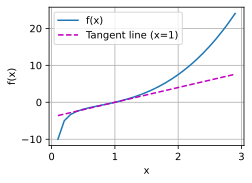

In [17]:
x = np.arange(0.1, 3, 0.1)
def function(x):
    return x**3-1/x
plot(x, [function(x), 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

2. 求函数$f(\mathbf{x})=3x_1^2+5e^{x_2}$的梯度
$$
\frac{\partial f}{\partial x}=\left[ \begin{array}{c}
	6x_1\\
	5e^{x_2}\\
\end{array} \right] 
$$
3. 函数 $f(\mathbf{x}) = \|\mathbf{x}\|_2$ 的梯度是什么？



函数 $f(\mathbf{x}) = \|\mathbf{x}\|_2$ 表示向量 $\mathbf{x}$ 的L2范数（或欧几里得范数）。假设 $\mathbf{x} = [x_1, x_2, \dots, x_n]^T$，我们可以将该函数重写为：
$$
f(\mathbf{x}) = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2} = \left(\sum_{i=1}^n x_i^2\right)^{1/2}
$$

为了求梯度 $\nabla f(\mathbf{x})$，我们需要计算函数对每个分量 $x_k$ 的偏导数 $\frac{\partial f}{\partial x_k}$。这里我们使用链式法则，令 $g(\mathbf{x}) = \sum_{i=1}^n x_i^2$，则 $f(\mathbf{x}) = \sqrt{g(\mathbf{x})}$。

$$
\frac{\partial f}{\partial x_k} = \frac{d\sqrt{g}}{dg} \cdot \frac{\partial g}{\partial x_k}
$$
其中：
   $$\frac{d\sqrt{g}}{dg} = \frac{1}{2\sqrt{g}} = \frac{1}{2\sqrt{\sum_{i=1}^n x_i^2}} = \frac{1}{2\|\mathbf{x}\|_2}$$
   $$\frac{\partial g}{\partial x_k} = \frac{\partial}{\partial x_k} \left(\sum_{i=1}^n x_i^2\right) = 2x_k$$

将两部分相乘：
$$
\frac{\partial f}{\partial x_k} = \frac{1}{2\|\mathbf{x}\|_2} \cdot (2x_k) = \frac{x_k}{\|\mathbf{x}\|_2}
$$

将所有偏导数组合成梯度向量：
$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{x_1}{\|\mathbf{x}\|_2} \\
\frac{x_2}{\|\mathbf{x}\|_2} \\
\vdots \\
\frac{x_n}{\|\mathbf{x}\|_2}
\end{bmatrix} = \frac{1}{\|\mathbf{x}\|_2} \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix} = \frac{\mathbf{x}}{\|\mathbf{x}\|_2}
$$
**结论**: L2范数的梯度是向量自身除以其L2范数，即其单位向量。

**重要提示**: 当 $\mathbf{x} = \mathbf{0}$ 时，分母为零，函数在原点是不可微的。因此，这个梯度公式只在 $\mathbf{x} \neq \mathbf{0}$ 时成立。

4. 尝试写出函数 $u = f(x, y, z)$，其中 $x = x(a, b)$, $y = y(a, b)$, $z = z(a, b)$ 的链式法则


这是一个典型的多元复合函数求导问题，其核心思想是 **全微分** 和 **链式法则**。最终变量 $u$ 的变化是由中间变量 $a$ 和 $b$ 引起的。我们要计算的是 $u$ 对 $a$ 和 $b$ 的偏导数，即 $\frac{\partial u}{\partial a}$ 和 $\frac{\partial u}{\partial b}$。

变量之间的依赖关系可以看作一个计算图：
$(a, b) \rightarrow (x, y, z) \rightarrow u$

**1. 计算 $\frac{\partial u}{\partial a}$**

变量 $a$ 的微小变化 $\Delta a$ 会通过 $x, y, z$ 三个路径影响最终的 $u$。我们需要将这三个路径带来的影响加起来。

*   通过 $x$ 的路径: $a \rightarrow x \rightarrow u$。影响为 $\frac{\partial u}{\partial x} \frac{\partial x}{\partial a}$
*   通过 $y$ 的路径: $a \rightarrow y \rightarrow u$。影响为 $\frac{\partial u}{\partial y} \frac{\partial y}{\partial a}$
*   通过 $z$ 的路径: $a \rightarrow z \rightarrow u$。影响为 $\frac{\partial u}{\partial z} \frac{\partial z}{\partial a}$

将它们相加，得到 $u$ 对 $a$ 的总偏导数：
$$
\frac{\partial u}{\partial a} = \frac{\partial f}{\partial x} \frac{\partial x}{\partial a} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial a} + \frac{\partial f}{\partial z} \frac{\partial z}{\partial a}
$$

**2. 计算 $\frac{\partial u}{\partial b}$**

同理，变量 $b$ 的变化也会通过三条路径影响 $u$：
$$
\frac{\partial u}{\partial b} = \frac{\partial f}{\partial x} \frac{\partial x}{\partial b} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial b} + \frac{\partial f}{\partial z} \frac{\partial z}{\partial b}
$$

这个法则正是深度学习中 **反向传播（Backpropagation）** 算法的数学核心。在神经网络中，$u$ 可以看作是损失函数，$a, b$ 是网络中较浅层的参数，而 $x, y, z$ 是较深层的激活值。计算损失函数对浅层参数的梯度，就需要沿着计算图从后往前、应用链式法则。

- 向量/矩阵形式 (更深刻的理解)

我们可以用雅可比矩阵（Jacobian Matrix）来更优雅地表示链式法则。

*   定义 $u$ 对 $(x, y, z)$ 的梯度向量（一个 $1 \times 3$ 的行向量或雅可比矩阵）:
    $$
    \frac{\partial u}{\partial(x, y, z)} = \begin{bmatrix} \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} & \frac{\partial f}{\partial z} \end{bmatrix}
    $$
*   定义 $(x, y, z)$ 对 $(a, b)$ 的雅可比矩阵（一个 $3 \times 2$ 矩阵）:
    $$
    \frac{\partial (x, y, z)}{\partial (a, b)} = \begin{bmatrix}
    \frac{\partial x}{\partial a} & \frac{\partial x}{\partial b} \\
    \frac{\partial y}{\partial a} & \frac{\partial y}{\partial b} \\
    \frac{\partial z}{\partial a} & \frac{\partial z}{\partial b}
    \end{bmatrix}
    $$

那么，$u$ 对 $(a, b)$ 的梯度向量可以通过矩阵乘法得到：
$$
\frac{\partial u}{\partial (a, b)} = \frac{\partial u}{\partial(x, y, z)} \cdot \frac{\partial (x, y, z)}{\partial (a, b)}
$$
$$
\begin{bmatrix} \frac{\partial u}{\partial a} & \frac{\partial u}{\partial b} \end{bmatrix} =
\begin{bmatrix} \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} & \frac{\partial f}{\partial z} \end{bmatrix}
\begin{bmatrix}
\frac{\partial x}{\partial a} & \frac{\partial x}{\partial b} \\
\frac{\partial y}{\partial a} & \frac{\partial y}{\partial b} \\
\frac{\partial z}{\partial a} & \frac{\partial z}{\partial b}
\end{bmatrix}
$$
执行这个矩阵乘法，你会发现得到的结果与前面分步推导的两个公式完全一致。这种向量化的视角在处理高维问题时尤其重要。